# Film Success Analysis: Budgets, Genres, and Release Timing

*Author:* Sammy Kariuki Kimani

## Overview

This project seeks to address the critical business problem of optimizing Microsoft's entry into the film industry by leveraging data-driven insights. I analyzed a comprehensive dataset comprising movie production budgets, genres, release dates, and box office revenues to unearth valuable patterns and correlations. Our methods encompassed exploratory data analysis and visualizations. Key findings include the significant influence of production budgets on box office success, genre-related revenue variations, and the impact of release timing on earnings. In response, we offer actionable recommendations to guide Microsoft's film production strategy, emphasizing prudent budget allocation, genre selection, and strategic release timing to maximize revenue potential and success in the highly competitive movie industry.


## Business Problem

Microsoft recognizes the growing trend of major companies entering the original video content market and is eager to establish its presence by launching a new movie studio. However, with limited experience in the film industry, Microsoft faces the challenge of determining what types of films are currently thriving at the box office. The goal is to gain a deep understanding of the factors driving box office success and translate these findings into actionable insights that the head of Microsoft's new movie studio can use to make informed decisions regarding the types of films to produce.

### Data Analysis Questions

  1. _Budget vs. Revenue Relationship:_ We aim to investigate how production budgets influence a movie's box office performance. Is there a discernible correlation between the size of the budget and box office revenue, and if so, what does this relationship entail?

  2. _Genre-Based Revenue Performance:_ To identify the most lucrative film genres, we will analyze how different genres correlate with higher box office revenue. Which genres tend to generate the most revenue, and can these insights inform genre selection?

  3. _Release Timing Impact:_ Timing is critical in the film industry. We will explore how release timing, including seasonal trends and holiday releases, affects box office revenue. What are the optimal times to release films for maximum financial success?


  These data analysis questions hold immense importance for Microsoft's venture into the film industry. Understanding the budget-revenue relationship aids in strategic investment decisions, ensuring profitable returns. Identifying revenue-generating genres enables the creation of audience-centric content, increasing box office success chances. Additionally, insights into release timing enhance the development of a savvy release strategy. By addressing these questions, Microsoft gains a competitive edge, making informed choices and positioning itself for success in a dynamic and competitive film market.


## Data Understanding

The data used for this project comprises information related to movies and their box office performance.
The data source for this project could be a combination of publicly available datasets from movie databases  which are The Movie Database(TMDB) and The Numbers(tn) budget data.These datasets may have been collected over time and can include information on a wide range of movies.

This data encompasses attributes such as production budgets, genres, release dates, and worldwide box office earnings. The primary target variable is "worldwide_gross," which signifies box office revenue. Key properties of these variables include numerical budgets, categorical genres, date-based release dates, and continuous revenue values.

This data is instrumental in addressing questions related to budget-revenue relationships, genre-based revenue performance, and the impact of release timing on box office success.


## Data Exploration and Preparation

Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Importing the necessary data for the analysis

In [2]:
tmdb = pd.read_csv("tmdb.movies.csv",index_col=False)
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
tmdb.drop(columns=tmdb.columns[0],inplace=True)
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
#Function for checking the necessary info from a dataframe
def check_dataframe_info(dataframe):
    # Get the shape (dimensions) of the DataFrame
    shape = dataframe.shape

    # Get summary statistics for numeric columns
    describe = dataframe.describe()

    # Get information about data types and non-null counts
    info = dataframe.info()

    result = {
        'shape': shape,
        'describe': describe,
        'info': info
    }

    return result
  
check_dataframe_info(tmdb)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


{'shape': (26517, 9),
 'describe':                   id    popularity  vote_average    vote_count
 count   26517.000000  26517.000000  26517.000000  26517.000000
 mean   295050.153260      3.130912      5.991281    194.224837
 std    153661.615648      4.355229      1.852946    960.961095
 min        27.000000      0.600000      0.000000      1.000000
 25%    157851.000000      0.600000      5.000000      2.000000
 50%    309581.000000      1.374000      6.000000      5.000000
 75%    419542.000000      3.694000      7.000000     28.000000
 max    608444.000000     80.773000     10.000000  22186.000000,
 'info': None}

In [5]:
tmdb.drop("title", axis=1,inplace=True)

tmdb.head()


,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186


We require another dataset from the number which enatails all the information concerning the financial aspects of movie production i.e production budget and worldwide gross revenue

In [6]:
movie_budget = pd.read_csv("tn.movie_budgets.csv",index_col="id")
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
check_dataframe_info(movie_budget)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


{'shape': (5782, 5),
 'describe':         release_date      movie production_budget domestic_gross  \
 count           5782       5782              5782           5782   
 unique          2418       5698               509           5164   
 top     Dec 31, 2014  Halloween       $20,000,000             $0   
 freq              24          3               231            548   
 
        worldwide_gross  
 count             5782  
 unique            5356  
 top                 $0  
 freq               367  ,
 'info': None}

In [8]:
# Define the columns to processfor conversion to float

columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Remove dollar signs and commas, and convert to float for each column
for column in columns_to_convert:
    movie_budget[column] = movie_budget[column].str.replace('[\$,]', '', regex=True).astype(float)

# Check DataFrame information
check_dataframe_info(movie_budget)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


{'shape': (5782, 5),
 'describe':        production_budget  domestic_gross  worldwide_gross
 count       5.782000e+03    5.782000e+03     5.782000e+03
 mean        3.158776e+07    4.187333e+07     9.148746e+07
 std         4.181208e+07    6.824060e+07     1.747200e+08
 min         1.100000e+03    0.000000e+00     0.000000e+00
 25%         5.000000e+06    1.429534e+06     4.125415e+06
 50%         1.700000e+07    1.722594e+07     2.798445e+07
 75%         4.000000e+07    5.234866e+07     9.764584e+07
 max         4.250000e+08    9.366622e+08     2.776345e+09,
 'info': None}

Merging the DataFrames

In [9]:
merged_data = pd.merge(movie_budget,tmdb,left_on="movie",right_on="original_title",how="inner")
merged_data.head()

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,7.4,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
4,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510


In [10]:
check_dataframe_info(merged_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date_x     2316 non-null   object 
 1   movie              2316 non-null   object 
 2   production_budget  2316 non-null   float64
 3   domestic_gross     2316 non-null   float64
 4   worldwide_gross    2316 non-null   float64
 5   genre_ids          2316 non-null   object 
 6   id                 2316 non-null   int64  
 7   original_language  2316 non-null   object 
 8   original_title     2316 non-null   object 
 9   popularity         2316 non-null   float64
 10  release_date_y     2316 non-null   object 
 11  vote_average       2316 non-null   float64
 12  vote_count         2316 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 253.3+ KB


{'shape': (2316, 13),
 'describe':        production_budget  domestic_gross  worldwide_gross             id  \
 count       2.316000e+03    2.316000e+03     2.316000e+03    2316.000000   
 mean        3.790108e+07    4.953869e+07     1.201667e+08  210410.569516   
 std         5.150964e+07    8.261483e+07     2.218496e+08  144548.546190   
 min         9.000000e+03    0.000000e+00     0.000000e+00      62.000000   
 25%         5.000000e+06    7.788272e+05     3.224914e+06   71862.750000   
 50%         1.900000e+07    2.015790e+07     3.722812e+07  208501.500000   
 75%         4.650000e+07    5.830223e+07     1.248731e+08  330641.750000   
 max         4.250000e+08    7.605076e+08     2.776345e+09  587627.000000   
 
         popularity  vote_average    vote_count  
 count  2316.000000   2316.000000   2316.000000  
 mean     10.685747      6.206261   1712.143351  
 std       8.244311      1.178079   2704.578576  
 min       0.600000      0.000000      1.000000  
 25%       5.487000  

In [11]:
#drop the columns that are not to be used

merged_data.drop(["original_title","original_language","id","release_date_x","vote_average","vote_count","popularity"], axis=1,inplace=True)

merged_data.head()

,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,release_date_y
0,Avatar,425000000.0,760507625.0,2.776345e+09,"[28, 12, 14, 878]",2009-12-18
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"[12, 28, 14]",2011-05-20
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"[28, 12, 878]",2015-05-01
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"[12, 28, 14]",2018-04-27
4,Justice League,300000000.0,229024295.0,6.559452e+08,"[28, 12, 14, 878]",2017-11-17


In [12]:
check_dataframe_info(merged_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2316 non-null   object 
 1   production_budget  2316 non-null   float64
 2   domestic_gross     2316 non-null   float64
 3   worldwide_gross    2316 non-null   float64
 4   genre_ids          2316 non-null   object 
 5   release_date_y     2316 non-null   object 
dtypes: float64(3), object(3)
memory usage: 126.7+ KB


{'shape': (2316, 6),
 'describe':        production_budget  domestic_gross  worldwide_gross
 count       2.316000e+03    2.316000e+03     2.316000e+03
 mean        3.790108e+07    4.953869e+07     1.201667e+08
 std         5.150964e+07    8.261483e+07     2.218496e+08
 min         9.000000e+03    0.000000e+00     0.000000e+00
 25%         5.000000e+06    7.788272e+05     3.224914e+06
 50%         1.900000e+07    2.015790e+07     3.722812e+07
 75%         4.650000e+07    5.830223e+07     1.248731e+08
 max         4.250000e+08    7.605076e+08     2.776345e+09,
 'info': None}

We need to check for a chance that there are duplicates in the movie name column

In [13]:
merged_data["movie"].value_counts()

Home                              18
Legend                            10
The Gift                           8
Eden                               7
Truth or Dare                      5
                                  ..
Transformers: Dark of the Moon     1
The Homesman                       1
A Wrinkle in Time                  1
The Cry of the Owl                 1
Blood Done Sign My Name            1
Name: movie, Length: 1908, dtype: int64

In [14]:
#removing the duplicates

merged_data = merged_data.drop_duplicates(subset = "movie")

In [15]:
merged_data["movie"].value_counts()

Premonition                                         1
A Simple Favor                                      1
Teenage Mutant Ninja Turtles: Out of the Shadows    1
USS Indianapolis: Men of Courage                    1
The Conspirator                                     1
                                                   ..
The Gambler                                         1
Ghostbusters                                        1
Super                                               1
Endless Love                                        1
Blood Done Sign My Name                             1
Name: movie, Length: 1908, dtype: int64

Now that the data is clean then we proceed to our research questions 

## Q1. To analyse the Relationship between the budget and Revenue

In [16]:
merged_data.columns

Index(['movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'genre_ids', 'release_date_y'],
      dtype='object')

Now we extract the required data to a new table

In [17]:
budget_and_revenue = merged_data.copy()

budget_and_revenue = budget_and_revenue[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross']]

budget_and_revenue.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
4,Justice League,300000000.0,229024295.0,6.559452e+08


Next we use the user defined function check_dataframe_info() to be able to check the summary statistics for the data

In [18]:

check_dataframe_info(budget_and_revenue)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2315
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1908 non-null   object 
 1   production_budget  1908 non-null   float64
 2   domestic_gross     1908 non-null   float64
 3   worldwide_gross    1908 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.5+ KB


{'shape': (1908, 4),
 'describe':        production_budget  domestic_gross  worldwide_gross
 count       1.908000e+03    1.908000e+03     1.908000e+03
 mean        3.870225e+07    4.886837e+07     1.201366e+08
 std         5.224672e+07    8.110079e+07     2.235703e+08
 min         9.000000e+03    0.000000e+00     0.000000e+00
 25%         5.000000e+06    8.308290e+05     3.168816e+06
 50%         2.000000e+07    2.025614e+07     3.648161e+07
 75%         5.000000e+07    5.845285e+07     1.266096e+08
 max         4.250000e+08    7.605076e+08     2.776345e+09,
 'info': None}

Since we are checking the total revenue and budget we need to calculate the profit and the total gross


In [19]:
# Create a new column 'Profit' by subtracting 'production_budget' from 'Worldwide Gross'
budget_and_revenue['Profit'] = budget_and_revenue['worldwide_gross'] - budget_and_revenue['production_budget']
# Create a new column 'Foreign_gross' by subtracting 'production_budget' from 'Worldwide Gross'
budget_and_revenue['Foreign_gross'] = budget_and_revenue['worldwide_gross'] - budget_and_revenue['domestic_gross']

check_dataframe_info(budget_and_revenue)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2315
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1908 non-null   object 
 1   production_budget  1908 non-null   float64
 2   domestic_gross     1908 non-null   float64
 3   worldwide_gross    1908 non-null   float64
 4   Profit             1908 non-null   float64
 5   Foreign_gross      1908 non-null   float64
dtypes: float64(5), object(1)
memory usage: 104.3+ KB


{'shape': (1908, 6),
 'describe':        production_budget  domestic_gross  worldwide_gross        Profit  \
 count       1.908000e+03    1.908000e+03     1.908000e+03  1.908000e+03   
 mean        3.870225e+07    4.886837e+07     1.201366e+08  8.143435e+07   
 std         5.224672e+07    8.110079e+07     2.235703e+08  1.844095e+08   
 min         9.000000e+03    0.000000e+00     0.000000e+00 -1.104502e+08   
 25%         5.000000e+06    8.308290e+05     3.168816e+06 -1.743919e+06   
 50%         2.000000e+07    2.025614e+07     3.648161e+07  1.353161e+07   
 75%         5.000000e+07    5.845285e+07     1.266096e+08  7.757087e+07   
 max         4.250000e+08    7.605076e+08     2.776345e+09  2.351345e+09   
 
        Foreign_gross  
 count   1.908000e+03  
 mean    7.126822e+07  
 std     1.492079e+08  
 min     0.000000e+00  
 25%     3.651838e+05  
 50%     1.338738e+07  
 75%     6.437166e+07  
 max     2.015838e+09  ,
 'info': None}

### Data Vizualization
Now we check how the budget is related to the total gross and also how it is related to the individual gross for both the domestic and foreign gross

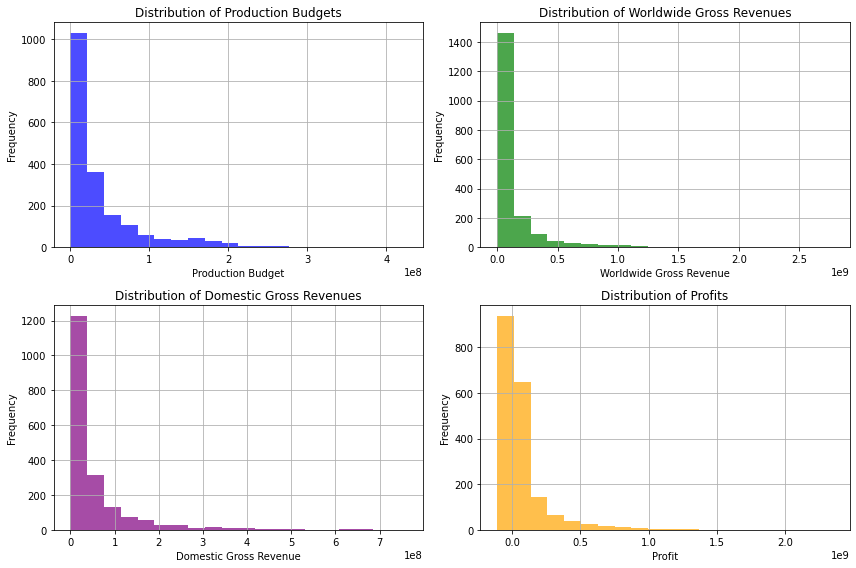

In [20]:
# Create a figure and an array of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot a histogram for production budgets
axs[0, 0].hist(budget_and_revenue['production_budget'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Distribution of Production Budgets')
axs[0, 0].set_xlabel('Production Budget')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

# Plot a histogram for worldwide gross revenues
axs[0, 1].hist(budget_and_revenue['worldwide_gross'], bins=20, color='green', alpha=0.7)
axs[0, 1].set_title('Distribution of Worldwide Gross Revenues')
axs[0, 1].set_xlabel('Worldwide Gross Revenue')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Plot a histogram for domestic gross revenues
axs[1, 0].hist(budget_and_revenue['domestic_gross'], bins=20, color='purple', alpha=0.7)
axs[1, 0].set_title('Distribution of Domestic Gross Revenues')
axs[1, 0].set_xlabel('Domestic Gross Revenue')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Plot a histogram for profits
axs[1, 1].hist(budget_and_revenue['Profit'], bins=20, color='orange', alpha=0.7)
axs[1, 1].set_title('Distribution of Profits')
axs[1, 1].set_xlabel('Profit')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In the Histograms provided it clearly shows that the data is skewed to the right so a positive skew since most of the values are concentrated to the right side

Now we want to check the relationship between the budget and revenue and also check how prfitable the movie industry is.

In [21]:

# Calculate correlation between production budget and different revenue metrics
revenue_columns = ['domestic_gross', 'worldwide_gross', 'Profit','Foreign_gross']


# Create a dictionary to store correlations
correlations = {}

# Calculate correlations for each revenue metric
for column in revenue_columns:
    correlation = budget_and_revenue['production_budget'].corr(budget_and_revenue[column])
    correlations[column] = correlation
    
correlations

{'domestic_gross': 0.7319314525190813,
 'worldwide_gross': 0.8007374612067043,
 'Profit': 0.6874612731834285,
 'Foreign_gross': 0.8019741985894427}

Plotting the correlation information in the scatter plot

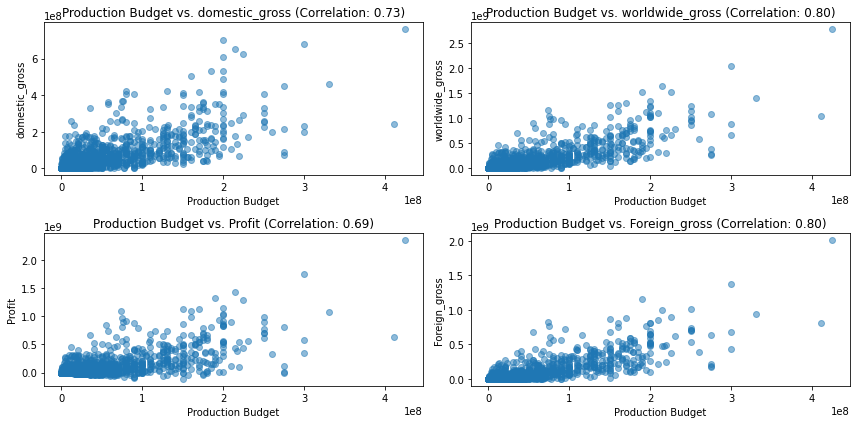

In [22]:

# Create scatterplots to visualize the relationships
plt.figure(figsize=(12, 6))

for i, column in enumerate(revenue_columns, 1):
    plt.subplot(2, 2, i)
    plt.scatter(budget_and_revenue['production_budget'], budget_and_revenue[column], alpha=0.5)
    plt.title(f'Production Budget vs. {column} (Correlation: {correlations[column]:.2f})')
    plt.xlabel('Production Budget')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

1. **Correlation between Production Budget and Domestic Gross (0.73):**

A correlation coefficient of 0.73 indicates a strong positive linear relationship between the production budget and domestic gross.
This means that as the production budget of a movie increases, the domestic gross tends to increase as well. In other words, movies with higher budgets tend to earn more at the domestic box office.

2. **Correlation between Production Budget and Wordlwide Gross (0.73):**

A correlation coefficient of 0.80 indicates a strong positive linear relationship between the production budget and worldwide gross.
This means that as the production budget of a movie increases, the worldwide gross tends to increase as well. Movies with higher budgets tend to have higher worldwide box office earnings.

3. **Correlation between Production Budget and Profit (0.69):**

A correlation coefficient of 0.69 indicates a strong positive linear relationship between the production budget and profit.
This means that as the production budget of a movie increases, the profit tends to increase as well. Movies with higher budgets tend to generate more profit.

4. **Correlation between Production Budget and Foreign Gross (0.80):**

A correlation coefficient of 0.80 indicates a strong positive linear relationship between the production budget and foreign gross.
This means that as the production budget of a movie increases, the foreign gross tends to increase as well. Movies with higher budgets tend to have higher worldwide box office earnings.

 ## Q2: To Explore Genre-Based Revenue Performance

 Here we examine how different movie genres perform with box office revenue.This will help us to be able to see which other factors influence the revenue apart budget which was demonstrated above



In [23]:

merged_data.columns

Index(['movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'genre_ids', 'release_date_y'],
      dtype='object')

In [24]:
# Extract the required Data
genre_and_revenue = merged_data.copy()

genre_and_revenue = genre_and_revenue[['movie',"genre_ids" ,'worldwide_gross',"production_budget"]]

genre_and_revenue.head()

,movie,genre_ids,worldwide_gross,production_budget
0,Avatar,"[28, 12, 14, 878]",2.776345e+09,425000000.0
1,Pirates of the Caribbean: On Stranger Tides,"[12, 28, 14]",1.045664e+09,410600000.0
2,Avengers: Age of Ultron,"[28, 12, 878]",1.403014e+09,330600000.0
3,Avengers: Infinity War,"[12, 28, 14]",2.048134e+09,300000000.0
4,Justice League,"[28, 12, 14, 878]",6.559452e+08,300000000.0


In [25]:
#create the profit column
genre_and_revenue['Profit'] = genre_and_revenue['worldwide_gross'] - genre_and_revenue['production_budget']

genre_and_revenue.head()


,movie,genre_ids,worldwide_gross,production_budget,Profit
0,Avatar,"[28, 12, 14, 878]",2.776345e+09,425000000.0,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,"[12, 28, 14]",1.045664e+09,410600000.0,6.350639e+08
2,Avengers: Age of Ultron,"[28, 12, 878]",1.403014e+09,330600000.0,1.072414e+09
3,Avengers: Infinity War,"[12, 28, 14]",2.048134e+09,300000000.0,1.748134e+09
4,Justice League,"[28, 12, 14, 878]",6.559452e+08,300000000.0,3.559452e+08


In [26]:
check_dataframe_info(genre_and_revenue)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2315
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1908 non-null   object 
 1   genre_ids          1908 non-null   object 
 2   worldwide_gross    1908 non-null   float64
 3   production_budget  1908 non-null   float64
 4   Profit             1908 non-null   float64
dtypes: float64(3), object(2)
memory usage: 89.4+ KB


{'shape': (1908, 5),
 'describe':        worldwide_gross  production_budget        Profit
 count     1.908000e+03       1.908000e+03  1.908000e+03
 mean      1.201366e+08       3.870225e+07  8.143435e+07
 std       2.235703e+08       5.224672e+07  1.844095e+08
 min       0.000000e+00       9.000000e+03 -1.104502e+08
 25%       3.168816e+06       5.000000e+06 -1.743919e+06
 50%       3.648161e+07       2.000000e+07  1.353161e+07
 75%       1.266096e+08       5.000000e+07  7.757087e+07
 max       2.776345e+09       4.250000e+08  2.351345e+09,
 'info': None}

We need now to replace the genre id with the actual genre name so that we are able to know which genre is which

In [27]:
#We have to replace the genre ids with the actual genres for the movies

genre_mapping = {
    28: 'Action',
    12: 'Adventure',
    14: 'Fantasy',
    878: 'Science Fiction',
    80: 'Crime',
    53: 'Thriller',
    16: 'Animation',
    10751: 'Family',
    35: 'Comedy',
    18: 'Drama',
    37: 'Western',
    10749: 'Romance',
    27: 'Horror',
    9648: 'Mystery',
    10402: 'Music',
    99: 'Documentary'
}


genre_and_revenue['genres'] = genre_and_revenue['genre_ids'].apply(lambda x: [genre_mapping.get(int(i)) for i in x.strip('[]').split(',') if i])


genre_and_revenue.head()




,movie,genre_ids,worldwide_gross,production_budget,Profit,genres
0,Avatar,"[28, 12, 14, 878]",2.776345e+09,425000000.0,2.351345e+09,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: On Stranger Tides,"[12, 28, 14]",1.045664e+09,410600000.0,6.350639e+08,"[Adventure, Action, Fantasy]"
2,Avengers: Age of Ultron,"[28, 12, 878]",1.403014e+09,330600000.0,1.072414e+09,"[Action, Adventure, Science Fiction]"
3,Avengers: Infinity War,"[12, 28, 14]",2.048134e+09,300000000.0,1.748134e+09,"[Adventure, Action, Fantasy]"
4,Justice League,"[28, 12, 14, 878]",6.559452e+08,300000000.0,3.559452e+08,"[Action, Adventure, Fantasy, Science Fiction]"


In [28]:
# Explode the lists in the 'genres' column
genre_and_revenue_exploded = genre_and_revenue.explode('genres')

# Count the values in the 'genres' column
genre_counts = genre_and_revenue_exploded['genres'].value_counts()

# Display the genre counts
print(genre_counts)

Drama              863
Comedy             580
Thriller           520
Action             465
Adventure          298
Horror             260
Crime              243
Romance            228
Science Fiction    214
Family             188
Fantasy            177
Mystery            139
Animation          125
Documentary         64
Music               47
Western             24
Name: genres, dtype: int64


Now that we have successfully created a `genres` column now we can be able to continue with our analysis and group by the data using the genres column

In [29]:
# Explode the lists in the 'genres' column into separate rows
genre_and_revenue = genre_and_revenue.explode('genres')

# Group data by movie genre and calculate relevant metrics (e.g., median)
genre_metrics = genre_and_revenue.groupby('genres')[['worldwide_gross',"Profit"]].mean().reset_index()

genre_metrics

,genres,worldwide_gross,Profit
0,Action,2.376999e+08,1.604274e+08
1,Adventure,3.489077e+08,2.430580e+08
2,Animation,3.237747e+08,2.418635e+08
3,Comedy,1.187455e+08,8.345633e+07
4,Crime,9.528684e+07,6.092358e+07
5,Documentary,5.025758e+07,3.216180e+07
6,Drama,7.094433e+07,4.541753e+07
7,Family,2.702646e+08,1.926481e+08
8,Fantasy,3.059378e+08,2.097191e+08
9,Horror,5.826178e+07,4.051170e+07


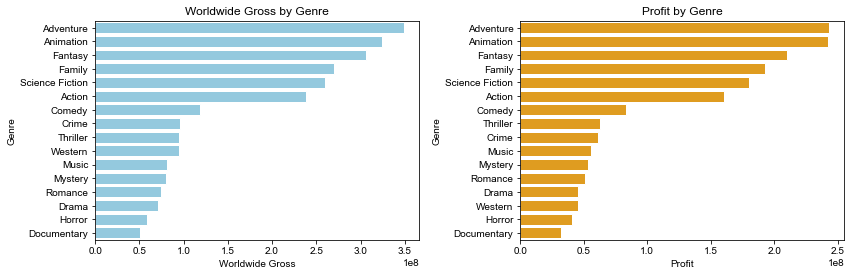

In [30]:
# Sort the DataFrame by 'Worldwide Gross' and 'Profit' in descending order
genre_metrics = genre_metrics.sort_values(by=['worldwide_gross', 'Profit'], ascending=False)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot 'Worldwide Gross' on the first subplot
sns.set(style="dark")
sns.barplot(x=genre_metrics["worldwide_gross"], y=genre_metrics["genres"], data=genre_metrics, color='skyblue', ax=ax1)
ax1.set_xlabel('Worldwide Gross')
ax1.set_ylabel('Genre')
ax1.set_title('Worldwide Gross by Genre')

# Plot 'Profit' on the second subplot
sns.set(style="dark")
sns.barplot(x=genre_metrics['Profit'], y=genre_metrics["genres"], data=genre_metrics, color='orange', ax=ax2, order=genre_metrics.sort_values(by='Profit', ascending=False)['genres'])
ax2.set_xlabel('Profit')
ax2.set_ylabel('Genre')
ax2.set_title('Profit by Genre')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

The above plots clearly show how the genres are distributed in terms of revenue and profit showing that Adventure is the most profitable genre whereas Documentaries are not as profitable in this metric

## Q3:  To Analyze the Impact of Release Date on Box Office Performance
Here we want to explore how the timing of a movie's release (e.g., seasonal trends, holiday releases) impacts its box office revenue.


In [31]:
merged_data.columns

Index(['movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'genre_ids', 'release_date_y'],
      dtype='object')

In [32]:
time_and_revenue = merged_data.copy()

time_and_revenue = time_and_revenue[["movie","release_date_y","worldwide_gross"]]
time_and_revenue.head()

,movie,release_date_y,worldwide_gross
0,Avatar,2009-12-18,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,1.045664e+09
2,Avengers: Age of Ultron,2015-05-01,1.403014e+09
3,Avengers: Infinity War,2018-04-27,2.048134e+09
4,Justice League,2017-11-17,6.559452e+08


In [33]:
check_dataframe_info(time_and_revenue)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2315
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie            1908 non-null   object 
 1   release_date_y   1908 non-null   object 
 2   worldwide_gross  1908 non-null   float64
dtypes: float64(1), object(2)
memory usage: 59.6+ KB


{'shape': (1908, 3),
 'describe':        worldwide_gross
 count     1.908000e+03
 mean      1.201366e+08
 std       2.235703e+08
 min       0.000000e+00
 25%       3.168816e+06
 50%       3.648161e+07
 75%       1.266096e+08
 max       2.776345e+09,
 'info': None}

In [34]:
#convert to date time the dataframe and renameit

time_and_revenue["release_date"] = pd.to_datetime(time_and_revenue["release_date_y"])
time_and_revenue.drop("release_date_y",axis=1,inplace=True)

time_and_revenue

,movie,worldwide_gross,release_date
0,Avatar,2.776345e+09,2009-12-18
1,Pirates of the Caribbean: On Stranger Tides,1.045664e+09,2011-05-20
2,Avengers: Age of Ultron,1.403014e+09,2015-05-01
3,Avengers: Infinity War,2.048134e+09,2018-04-27
4,Justice League,6.559452e+08,2017-11-17
...,...,...,...
2311,Exeter,4.897920e+05,2015-03-26
2312,Ten,0.000000e+00,2014-03-28
2313,Dry Spell,0.000000e+00,2013-02-14
2314,All Superheroes Must Die,0.000000e+00,2013-01-04


In [35]:
check_dataframe_info(time_and_revenue)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2315
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   movie            1908 non-null   object        
 1   worldwide_gross  1908 non-null   float64       
 2   release_date     1908 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.6+ KB


{'shape': (1908, 3),
 'describe':        worldwide_gross
 count     1.908000e+03
 mean      1.201366e+08
 std       2.235703e+08
 min       0.000000e+00
 25%       3.168816e+06
 50%       3.648161e+07
 75%       1.266096e+08
 max       2.776345e+09,
 'info': None}

In [36]:
time_and_revenue["Release_Month"] = time_and_revenue["release_date"].dt.month
time_and_revenue.head()

,movie,worldwide_gross,release_date,Release_Month
0,Avatar,2.776345e+09,2009-12-18,12
1,Pirates of the Caribbean: On Stranger Tides,1.045664e+09,2011-05-20,5
2,Avengers: Age of Ultron,1.403014e+09,2015-05-01,5
3,Avengers: Infinity War,2.048134e+09,2018-04-27,4
4,Justice League,6.559452e+08,2017-11-17,11


In [37]:
# Define a dictionary to map numerical months to month names
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map the 'Release_Month' column to month names
time_and_revenue['Release_Month'] = time_and_revenue['Release_Month'].map(month_mapping)

time_and_revenue.head()

,movie,worldwide_gross,release_date,Release_Month
0,Avatar,2.776345e+09,2009-12-18,December
1,Pirates of the Caribbean: On Stranger Tides,1.045664e+09,2011-05-20,May
2,Avengers: Age of Ultron,1.403014e+09,2015-05-01,May
3,Avengers: Infinity War,2.048134e+09,2018-04-27,April
4,Justice League,6.559452e+08,2017-11-17,November


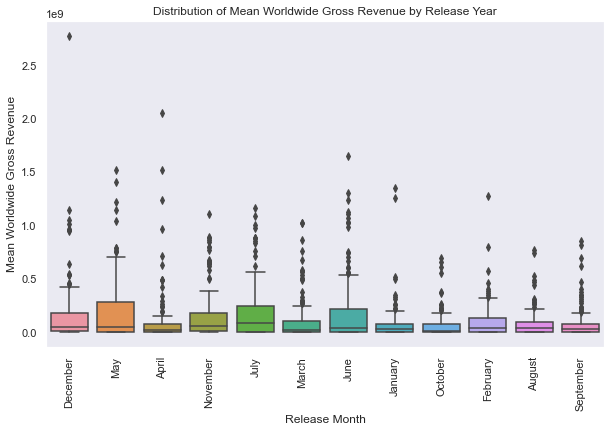

In [38]:
# Create a boxplot to visualize the distribution

plt.figure(figsize=(10, 6))
sns.boxplot(data=time_and_revenue, x='Release_Month', y='worldwide_gross')
plt.xlabel('Release Month')
plt.ylabel('Mean Worldwide Gross Revenue')
plt.title('Distribution of Mean Worldwide Gross Revenue by Release Year')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



Best Months for Releases: December, May, April, and November are optimal months for movie releases, thanks to their higher median revenue, even with outliers considered.

Greater Variability: Months like May, July, and June have taller boxes, indicating more revenue variability, making success less predictable.

Wider Revenue Range: Months with longer whiskers, including May, have a wider revenue range, suggesting greater performance variation.

Outlier Investigation: Investigate months with data points beyond whiskers, like December, as potential outliers. For instance, Christmas movies in December can greatly boost revenue due to genre-specific factors.

In conclusion, understanding box office performance by release month is vital for movie production. Continuous outlier investigation and industry monitoring are key in this dynamic field.

## Conclusion

The analysis conducted in this project yields valuable insights for Microsoft's entry into the film industry. Here are the key takeaways and recommendations:

1. Budget vs. Revenue Relationship: The analysis indicates a positive correlation between production budgets and box office revenue and also profit suggesting that higher budgets can lead to greater earnings. However, this relationship is not necessarily causal, and careful budget allocation and cost management are essential. It is recommended that Microsoft consider allocating budgets strategically based on genre and release timing to maximize returns.


2. Genre-Based Revenue Performance: Certain movie genres consistently generate higher box office revenue than others in this case adventure. Microsoft should consider producing films in genres that have demonstrated strong revenue performance in the analysis. However, audience preferences can change over time, so ongoing market research is necessary.

3. Release Timing Impact: The timing of a movie's release has a significant impact on box office revenue. Microsoft should strategically plan release dates to leverage seasonal trends and optimize revenue potential. This requires a well-thought-out release calendar that considers competition and target audience.



## Next Steps:

Market Research: Conduct market research to understand current audience preferences, emerging genres, and evolving consumer behavior.

Advanced Modeling: Consider advanced statistical models or machine learning techniques to build predictive models for box office performance.

Collaboration: Partner with industry experts and consultants to gain deeper insights into the film market.

Continuous Monitoring: Continuously monitor box office performance, adapt strategies, and make data-driven decisions based on real-time data.